# Sumo Wrestling Match Prediction

## Data Modeling Using PyCaret - incorporating new features (5/5)

## Contents: 
- [Install PyCaret](#Install-PyCaret)
- [Setup](#Setup)
- [Compare Models](#Compare-Models)
- [Tune Model](#Tune-Model)
- [Ensemble Model](#Ensemble-Model)
- [Bagging](#Bagging)
- [Analyze Model](#Analyze-Model)
- [Predictions](#Predictions)
- [Save the model](#Save-the-model)
- [Evaluation](#Evaluation)

We use PyCaret, an open-source machine learning library in Python that automates machine learning workflows with minimal coding required. PyCaret allowed us to spend less time coding and more time analyzing data, by automating many of the repetitive tasks involved in the modeling process. Using PyCaret, we developed and tested a variety of different models.

We started by developing classification models using the existing numeric data to see how they performed before any feature engineering was done. Once we had a benchmark, we developed models incorporating new features created as part of our feature engineering process. This allowed us to see how these new features impacted the performance of our models, and whether they improved the ability to predict the outcome of matches.

### Install PyCaret

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:00
 

#### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pycaret

In [3]:
# Check version
pycaret.__version__

'3.0.0'

### Setup

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#!ls "/content/drive/MyDrive/Colab Notebooks/DS123/capstone/"

In [6]:
# Read in the data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS123/capstone/sumo_v3_eda_completed.csv")
df.head()

,r1_id,r1_win,r2_id,r1_height,r1_weight,r1_prev_w,r1_prev_l,r2_height,r2_weight,r2_prev_w,...,r1_now_l_calc,r2_now_w_calc,r2_now_l_calc,r1_curr_w_calc,r1_curr_l_calc,r2_curr_w_calc,r2_curr_l_calc,r1_heya_calc,r2_heya_calc,kimarite_calc
0,4140,0,4306,175.5,115.0,4.0,3.0,193.5,145.0,4.0,...,1,1,0,7,8,6,1,1,0,5
1,1337,0,4306,178.5,130.0,5.0,2.0,193.5,145.0,4.0,...,2,2,0,9,6,6,1,1,0,5
2,4097,1,4306,182.0,134.0,5.0,2.0,193.5,145.0,4.0,...,0,0,0,0,0,0,0,1,0,5
3,4140,1,4125,175.5,115.0,4.0,3.0,188.0,134.0,3.0,...,1,0,2,7,8,8,7,1,1,5
4,1337,1,4125,178.5,130.0,5.0,2.0,188.0,134.0,3.0,...,4,4,4,9,6,8,7,1,1,5


In [7]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226588 entries, 0 to 226587
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   r1_id                   226588 non-null  int64  
 1   r1_win                  226588 non-null  int64  
 2   r2_id                   226588 non-null  int64  
 3   r1_height               226588 non-null  float64
 4   r1_weight               226588 non-null  float64
 5   r1_prev_w               226588 non-null  float64
 6   r1_prev_l               226588 non-null  float64
 7   r2_height               226588 non-null  float64
 8   r2_weight               226588 non-null  float64
 9   r2_prev_w               226588 non-null  float64
 10  r2_prev_l               226588 non-null  float64
 11  r1_Japan_hometown_calc  226588 non-null  int64  
 12  r2_Japan_hometown_calc  226588 non-null  int64  
 13  r1_age_calc             226588 non-null  int64  
 14  r2_age_calc         

In [8]:
# Check data shape
df.shape

(226588, 40)

In [9]:
# Import classification models
from pycaret.classification import * 

In [10]:
# Setup
clf = setup(data = df, target = 'r1_win', train_size = 0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,r1_win
2,Target type,Binary
3,Original data shape,"(226588, 40)"
4,Transformed data shape,"(226588, 40)"
5,Transformed train set shape,"(181270, 40)"
6,Transformed test set shape,"(45318, 40)"
7,Numeric features,39
8,Preprocess,True
9,Imputation type,simple


### Compare Models

In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7799,0.8785,0.7795,0.7802,0.7798,0.5598,0.5599,4.9240
xgboost,Extreme Gradient Boosting,0.7796,0.8781,0.7805,0.7791,0.7798,0.5592,0.5593,48.9350
gbc,Gradient Boosting Classifier,0.7731,0.8730,0.7777,0.7706,0.7741,0.5462,0.5462,65.6110
lda,Linear Discriminant Analysis,0.7720,0.8677,0.7695,0.7734,0.7714,0.5440,0.5440,1.8290
ridge,Ridge Classifier,0.7719,0.0000,0.7695,0.7733,0.7714,0.5439,0.5439,0.6030
rf,Random Forest Classifier,0.7686,0.8678,0.7623,0.7721,0.7671,0.5372,0.5373,53.2930
et,Extra Trees Classifier,0.7672,0.8656,0.7616,0.7702,0.7659,0.5344,0.5344,45.1910
ada,Ada Boost Classifier,0.7631,0.8642,0.7598,0.7658,0.7621,0.5262,0.5272,13.9880
qda,Quadratic Discriminant Analysis,0.7610,0.8454,0.7624,0.7602,0.7613,0.5219,0.5219,1.1990
lr,Logistic Regression,0.7606,0.8430,0.7537,0.7643,0.7589,0.5212,0.5213,24.1150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [12]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Tune Model

In [13]:
# Tune the best model using grid search
tuned = tune_model(best, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7777,0.8754,0.7725,0.7807,0.7766,0.5555,0.5555
1,0.7785,0.8777,0.7759,0.7799,0.7779,0.5569,0.5569
2,0.7772,0.8746,0.7787,0.7763,0.7775,0.5544,0.5544
3,0.7796,0.8776,0.7852,0.7764,0.7808,0.5591,0.5591
4,0.7820,0.8791,0.7817,0.7822,0.7820,0.5641,0.5641
5,0.7801,0.8783,0.7819,0.7791,0.7805,0.5602,0.5602
6,0.7812,0.8780,0.7781,0.7829,0.7805,0.5623,0.5623
7,0.7830,0.8815,0.7854,0.7816,0.7835,0.5660,0.5660
8,0.7706,0.8716,0.7728,0.7694,0.7711,0.5411,0.5411


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
print(tuned)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Ensemble Model

In [16]:
# Create an ensemble model of LightGBM and decision tree models
ensemble = ensemble_model(best, fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7781,0.8772,0.7758,0.7794,0.7776,0.5562,0.5562
1,0.7802,0.8774,0.7786,0.7811,0.7799,0.5604,0.5604
2,0.7806,0.8787,0.7776,0.7824,0.7800,0.5613,0.5613
3,0.7820,0.8801,0.7832,0.7813,0.7822,0.5640,0.5640
4,0.7748,0.8746,0.7756,0.7744,0.7750,0.5497,0.5497
Mean,0.7792,0.8776,0.7782,0.7797,0.7789,0.5583,0.5583
Std,0.0025,0.0018,0.0028,0.0028,0.0024,0.0050,0.0050


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [17]:
print(ensemble)

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=LGBMClassifier(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=123,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent='warn', subsample=1.0,
                                           subsampl

### Bagging

In [19]:
# Bag the LightGBM model
bagged = ensemble_model(best, method='Bagging', fold=5, n_estimators=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7784,0.8772,0.7782,0.7785,0.7784,0.5568,0.5568
1,0.7805,0.8773,0.7810,0.7802,0.7806,0.5610,0.5610
2,0.7813,0.8784,0.7783,0.7830,0.7806,0.5626,0.5626
3,0.7818,0.8802,0.7817,0.7818,0.7817,0.5635,0.5635
4,0.7739,0.8745,0.7740,0.7739,0.7739,0.5479,0.5479
Mean,0.7792,0.8775,0.7787,0.7795,0.7791,0.5584,0.5584
Std,0.0029,0.0018,0.0027,0.0032,0.0028,0.0057,0.0057


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
print(bagged)

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=LGBMClassifier(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=123,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent='warn', subsample=1.0,
                                           subsampl

### Analyze Model

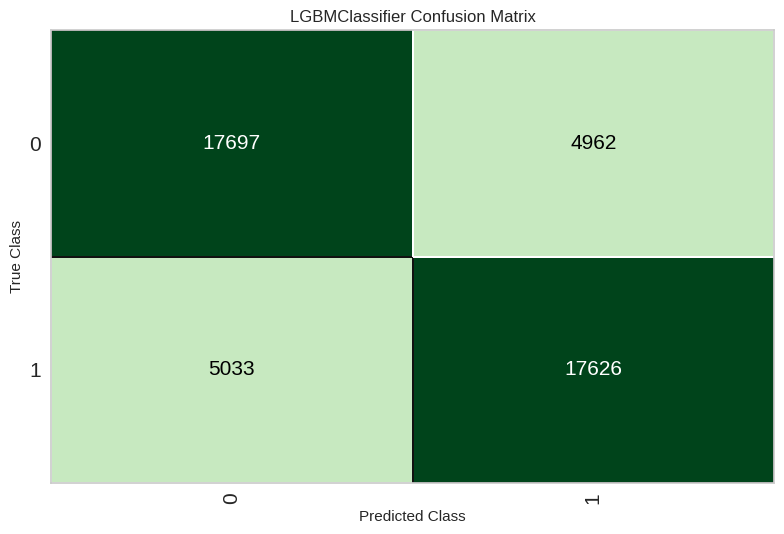

In [21]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

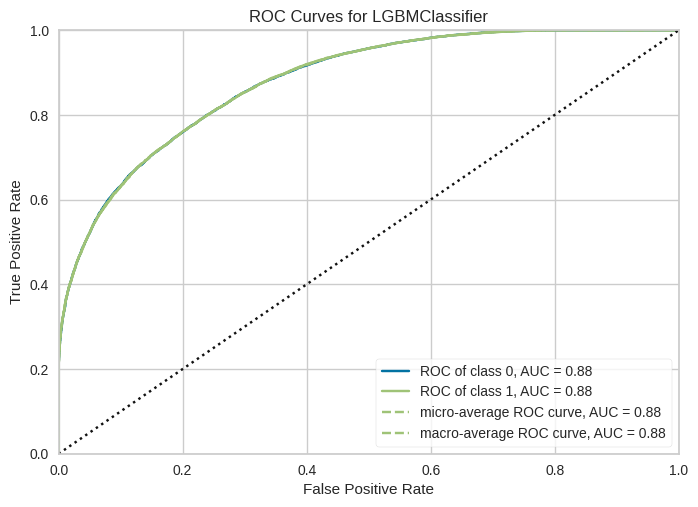

In [22]:
# plot AUC
plot_model(best, plot = 'auc')

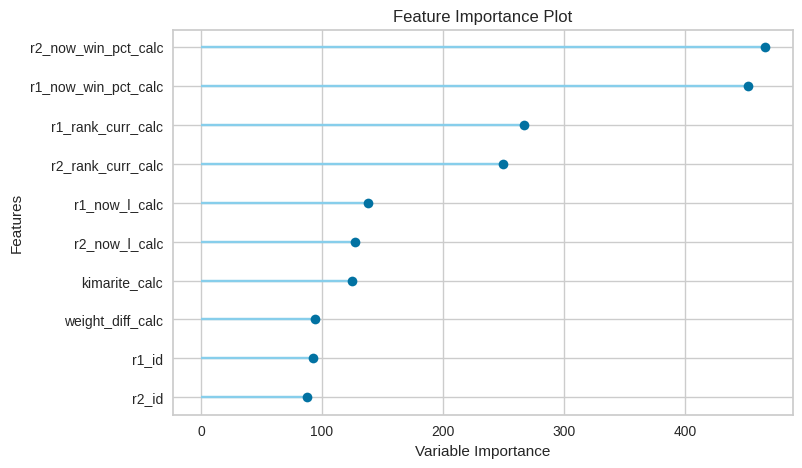

In [23]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
#evaluate_model(best)

### Predictions

In [25]:
# Predict on test set
pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7794,0.8797,0.7779,0.7803,0.7791,0.5589,0.5589


In [26]:
# show predictions df
pred.head()

,r1_id,r2_id,r1_height,r1_weight,r1_prev_w,r1_prev_l,r2_height,r2_weight,r2_prev_w,r2_prev_l,...,r1_curr_w_calc,r1_curr_l_calc,r2_curr_w_calc,r2_curr_l_calc,r1_heya_calc,r2_heya_calc,kimarite_calc,r1_win,prediction_label,prediction_score
83276,57,25,189.000000,191.0,7.0,8.0,178.000000,127.0,6.0,9.0,...,6,9,9,6,0,1,5,0,0,0.9240
121299,287,222,176.000000,140.0,8.0,7.0,177.000000,145.0,8.0,7.0,...,9,6,6,9,1,0,5,1,1,0.8208
16837,1362,4139,188.399994,131.0,6.0,9.0,174.000000,120.0,7.0,8.0,...,10,5,8,7,1,1,5,1,1,0.7855
174229,6770,6010,184.000000,186.0,8.0,7.0,182.000000,182.0,4.0,11.0,...,0,0,0,0,0,1,5,0,1,0.5433
92616,145,43,182.500000,121.5,9.0,6.0,183.600006,149.5,4.0,11.0,...,8,7,6,9,1,1,5,1,1,0.8738


### Save the model

In [27]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['r1_id', 'r2_id', 'r1_height',
                                              'r1_weight', 'r1_prev_w',
                                              'r1_prev_l', 'r2_height',
                                              'r2_weight', 'r2_prev_w',
                                              'r2_prev_l',
                                              'r1_Japan_hometown_calc',
                                              'r2_Japan_hometown_calc',
                                              'r1_age_calc', 'r2_age_calc',
                                              'height_diff_calc',
                                              'weight_diff_calc',
                                              'r1_...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                           

### Evaluation

Here are the scores and metrics for models incorporating new features: 

| Model | Description | Accuracy | AUC    | Recall | Prec.  | F1     | Kappa  | MCC    | TT (Sec) |
|--|--|--|--|--|--|--|--|--|--|
| lightgbm | Light Gradient Boosting Machine | 0.7799 | 0.8785 | 0.7795 | 0.7802 | 0.7798 | 0.5598 | 0.5599 | 4.9240 |
| xgboost | Extreme Gradient Boosting | 0.7796 | 0.8781 | 0.7805 | 0.7791 | 0.7798 | 0.5592 | 0.5593 | 48.9350 |
| gbc | Gradient Boosting Classifier | 0.7731 | 0.8730 | 0.7777 | 0.7706 | 0.7741 | 0.5462 | 0.5462 | 65.6110 |
| lda | Linear Discriminant Analysis | 0.7720 | 0.8677 | 0.7695 | 0.7734 | 0.7714 | 0.5440 | 0.5440 | 1.8290 |
| ridge | Ridge Classifier | 0.7719 | 0.0000 | 0.7695 | 0.7733 | 0.7714 | 0.5439 | 0.5439 | 0.6030 |
| rf | Random Forest Classifier | 0.7686 | 0.8678 | 0.7623 | 0.7721 | 0.7671 | 0.5372 | 0.5373 | 53.2930 |
| et | Extra Trees Classifier | 0.7672 | 0.8656 | 0.7616 | 0.7702 | 0.7659 | 0.5344 | 0.5344 | 45.1910 |
| ada | Ada Boost Classifier | 0.7631 | 0.8642 | 0.7598 | 0.7658 | 0.7621 | 0.5262 | 0.5272 | 13.9880 |
| qda | Quadratic Discriminant Analysis | 0.7610 | 0.8454 | 0.7624 | 0.7602 | 0.7613 | 0.5219 | 0.5219 | 1.1990 |
| lr | Logistic Regression | 0.7606 | 0.8430 | 0.7537 | 0.7643 | 0.7589 | 0.5212 | 0.5213 | 24.1150 |
| nb | Naive Bayes | 0.7434 | 0.8282 | 0.7405 | 0.7447 | 0.7426 | 0.4867 | 0.4867 | 0.5010 |
| dt | Decision Tree Classifier | 0.7078 | 0.7078 | 0.7087 | 0.7074 | 0.7081 | 0.4156 | 0.4156 | 3.8840 |
| svm | SVM - Linear Kernel | 0.6626 | 0.0000 | 0.5944 | 0.7376 | 0.6220 | 0.3251 | 0.3668 | 17.4540 | 
| knn | K Neighbors Classifier | 0.5625 | 0.5877 | 0.5630 | 0.5625 | 0.5627 | 0.1250 | 0.1250 | 46.1080 | 
| dummy | Dummy Classifier | 0.50000 | 0.5000 | 0.5000 | 0.2500 | 0.3333 | 0.0000 | 0.0000 | 0.3660 | 


The above table shows the evaluation metrics for various models that incorporate new features. The models are evaluated using acuracy, AUC, recall, precision, F1-score, Kappa, Matthews correlation coefficient (MCC) and training time (TT). 

Overall, the evaluation metrics indicate that the models incorporating new features perform better than those with existing numeric data only. 

It is also noteworthy that Light Gradient Boosting Machine and Extreme Gradient Boosting have similar accuracy and AUC scores, but Light Gradient Boosting Machine performs better in identifying positive values, as shown by its slightly higher precision score. Additionally, while SVM - Linear Kernel has a low accuracy (0.6626) and AUC score (0.0000), it has a relatively high precision score (0.7376), indicating that when it does predict a positive value, it is likely to be correct. 

It is also interesting to note that Linear Discriminant Analysis has a relatively short training time (1.8290) compared to other models, but still performs relatively well in terms of accuracy (0.7720), AUC (0.8677), and other metrics. Naive Bayes has a low accuracy score (0.7434) compared to other models, but it still performs well in terms of recall (0.7405) and MCC scores (0.4867).
These insights can be useful in deciding which model to choose for a particular task or in improving the performance of existing models by incorporating new features.

In [ ]:
# Reference: https://pycaret.gitbook.io/docs/get-started/quickstart